# Your name: <Enter your name> Xinyu Zhou
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [31]:
# import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime


# Data File Reading Section
## Write code to read in data from external sources here

In [33]:
#read datasets
data = pd.read_csv('data.csv',encoding='cp1252')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [29]:
# Your code for this section here ...

In [ ]:
#1. Statistical Description of data (data.describe)
data.describe()

In [36]:
#2. Display number of total rows and columns of the dataset (data.shape)
data.shape

(435742, 13)

In [37]:
#3. Display number of non-null values for each column (data.count)
data.count()

stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            401096
no2                            419509
rspm                           395520
spm                            198355
location_monitoring_station    408251
pm2_5                            9314
date                           435735
dtype: int64

In [38]:
#4. Display number of null values for each column (sum of data.isnull)
data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [39]:
#5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [40]:
#6. Display Top 10 and Bottom 10 records (head and tail)
data.head()


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [41]:
data.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [42]:
# Cleaning up the data

#dropping columns that aren't required

data.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'],axis=1, inplace=True)

# dropping rows where no date is available

data.dropna(subset=['date'],inplace=True)

In [43]:
# displaying final columns (data.columns)

data.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [44]:
types = { "Residential": "R", "Residential and others": "RO", "Residential, Rural and other Areas": "RRO", "Industrial Area": "I", "Industrial Areas": "I", "Industrial": "I", "Sensitive Area": "S", "Sensitive Areas": "S", "Sensitive": "S", np.nan: "RRO" }
data.type = data.type.replace(types)


In [45]:
# Display top 10 records after codification of 'types'
data.type.head(10)

0    RRO
1      I
2    RRO
3    RRO
4      I
5    RRO
6    RRO
7      I
8    RRO
9      I
Name: type, dtype: object

### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [46]:
#Convert the column to 'datetime' type and extract the year to populate the new column
data['date']= pd.to_datetime(data['date'])
data['year'] = pd.DatetimeIndex(data['date']).year

In [47]:
# Display Top 5 records after the conversion.
data['year'].head()

0    1990
1    1990
2    1990
3    1990
4    1990
Name: year, dtype: int64

### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435735 entries, 0 to 435738
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   state     435735 non-null  object        
 1   location  435735 non-null  object        
 2   type      435735 non-null  object        
 3   so2       401092 non-null  float64       
 4   no2       419505 non-null  float64       
 5   rspm      395516 non-null  float64       
 6   spm       198355 non-null  float64       
 7   pm2_5     9314 non-null    float64       
 8   date      435735 non-null  datetime64[ns]
 9   year      435735 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 36.6+ MB


In [49]:
# define columns of importance, which shall be used reguarly (COLS = ....)
cols = ['so2','no2', 'rspm','spm','pm2_5']

In [50]:
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data[cols] = imputer.fit_transform(data[cols])

In [51]:
# Display data.info after the transformation
data.info

<bound method DataFrame.info of                  state   location   type  ...      pm2_5       date  year
0       Andhra Pradesh  Hyderabad    RRO  ...  40.791467 1990-02-01  1990
1       Andhra Pradesh  Hyderabad      I  ...  40.791467 1990-02-01  1990
2       Andhra Pradesh  Hyderabad    RRO  ...  40.791467 1990-02-01  1990
3       Andhra Pradesh  Hyderabad    RRO  ...  40.791467 1990-03-01  1990
4       Andhra Pradesh  Hyderabad      I  ...  40.791467 1990-03-01  1990
...                ...        ...    ...  ...        ...        ...   ...
435734     West Bengal   ULUBERIA  RIRUO  ...  40.791467 2015-12-15  2015
435735     West Bengal   ULUBERIA  RIRUO  ...  40.791467 2015-12-18  2015
435736     West Bengal   ULUBERIA  RIRUO  ...  40.791467 2015-12-21  2015
435737     West Bengal   ULUBERIA  RIRUO  ...  40.791467 2015-12-24  2015
435738     West Bengal   ULUBERIA  RIRUO  ...  40.791467 2015-12-29  2015

[435735 rows x 10 columns]>

In [52]:
# Display that there are no more missing values in the dataset
data.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
year        0
dtype: int64

## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

In [53]:
#Calculate median values for each state with values sorted in ascending order.
so2=data.groupby('state').so2.median().sort_values(ascending=False)

In [54]:
#display in (a) as table
so2=pd.DataFrame(so2)
so2

,so2
state,
Uttaranchal,25.100000
Uttarakhand,21.000000
Sikkim,19.800000
Jharkhand,18.700000
Gujarat,14.200000
Maharashtra,13.000000
Chhattisgarh,12.500000
Madhya Pradesh,10.829428
Haryana,10.829428


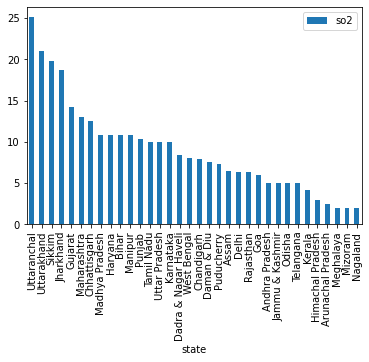

In [55]:
#display in (b) bar chart
so2.plot.bar()

Uttaranchal has the highest so2 content, and Nagaland has the lowest so2 content.

### no2 status

In [56]:
#Calculate median values for each state with values sorted in ascending order.
no2=data.groupby('state').no2.median().sort_values(ascending=False)

In [57]:
#display in (a) as table
no2=pd.DataFrame(no2)
no2

,no2
state,
West Bengal,53.700000
Delhi,45.000000
Jharkhand,42.000000
Bihar,32.000000
Maharashtra,29.000000
Punjab,28.300000
Uttaranchal,27.500000
Uttar Pradesh,27.000000
Sikkim,26.800000


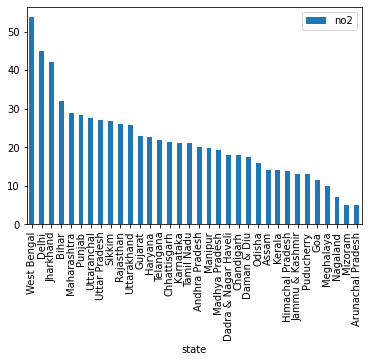

In [ ]:
#display in (b) bar chart
no2.plot.bar()

West Bengal has the highest no2 content, and Arunachal Pradesh has the lowest no2 content.

### rspm status

In [58]:
#Calculate median values for each state with values sorted in ascending order.
rspm=data.groupby('state').rspm.median().sort_values(ascending=False)

In [59]:
#display in (a) as table
rspm=pd.DataFrame(rspm)
rspm

,rspm
state,
Jharkhand,165.000000
Uttar Pradesh,160.000000
Punjab,147.000000
Haryana,137.500000
Delhi,136.000000
Uttarakhand,135.000000
Jammu & Kashmir,116.000000
Rajasthan,112.000000
Uttaranchal,112.000000


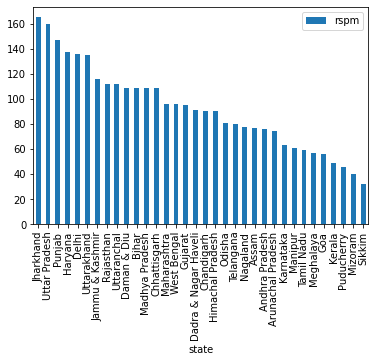

In [60]:
#display in (b) bar chart
rspm.plot.bar()

Jharkhand has the highest rspm content, and Sikkim has the lowest rspm content.

### spm status

In [61]:
#Calculate median values for each state with values sorted in ascending order.
spm=data.groupby('state').spm.median().sort_values(ascending=False)

In [62]:
#display in (a) as table
spm=pd.DataFrame(spm)
spm

,spm
state,
Uttaranchal,268.00000
Delhi,253.00000
West Bengal,220.78348
Madhya Pradesh,220.78348
Arunachal Pradesh,220.78348
Assam,220.78348
Bihar,220.78348
Chandigarh,220.78348
Chhattisgarh,220.78348


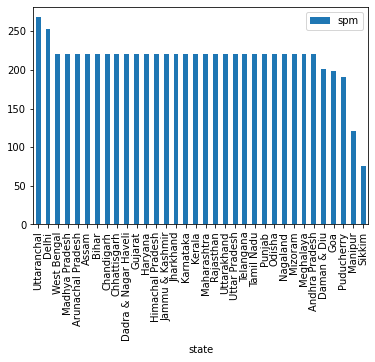

In [63]:
#display in (b) bar chart
spm.plot.bar()

Uttaranchal has the highest spm content, and Sikkim has the lowest spm content.

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [64]:
#‘Andhra Pradesh’ only and group it by ‘year’. 
AndhraPradesh=data[data.state=='Andhra Pradesh'].groupby('year').mean()

In [65]:
#Create a new dataframe containing the NO2, SO2, rspm, and spm data
AndhraPradesh=AndhraPradesh[['so2','no2','rspm','spm']]

In [66]:
#Display top 5 records after.
AndhraPradesh.head()

,so2,no2,rspm,spm
year,,,,
1990,8.868966,15.296552,108.833091,165.469596
1991,10.811111,18.827778,108.833091,154.466208
1992,19.766194,36.012866,108.833091,210.643678
1993,8.544444,15.961111,108.833091,220.783480
1994,10.760317,18.273016,108.833091,177.965950


In [67]:
#remove multi-index
AndhraPradesh=AndhraPradesh.reset_index()

In [68]:
#conver year to string datatype
AndhraPradesh.year=AndhraPradesh.year.apply(str)

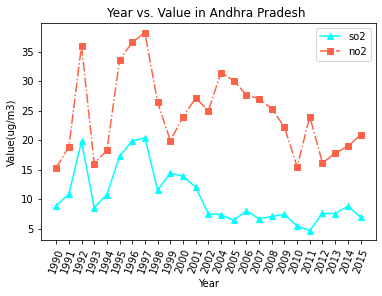

In [69]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2. 
# So, you will display TWO graphs altogether.
plt.plot(AndhraPradesh.year,AndhraPradesh.so2,linestyle='-',marker='^',label='so2', color='aqua')
plt.plot(AndhraPradesh.year,AndhraPradesh.no2,linestyle='-.',marker='s',label='no2', color='tomato')
plt.xticks(rotation=70)
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Value(ug/m3)')
plt.title('Year vs. Value in Andhra Pradesh ')
plt.show()

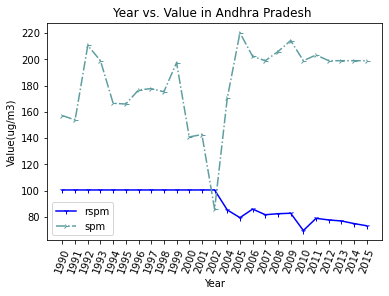

In [35]:
# Display yearly trend graph (year vs. value) in pairs: (a) rspm and spm 
plt.plot(AndhraPradesh.year,AndhraPradesh.rspm,linestyle='-',marker='1',label='rspm', color='blue')
plt.plot(AndhraPradesh.year,AndhraPradesh.spm,linestyle='-.',marker='4',label='spm', color='cadetblue')
plt.xticks(rotation=70)
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Value(ug/m3)')
plt.title('Year vs. Value in Andhra Pradesh ')
plt.show()

Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....



Yes. First, the state Andhra Pradesh has more volatile mo2, and the spread in value is high. From 2012-2015, the so2 value was gradually increasing which should rise our attention. Second, spm value was dramatically move up and down from 1999-2005 and then retained at high level. The high rspm does not good for heart or lung.

Besides, The so2 has a declining trend. rspm is more stable at low value.